### Loan Prediction System 
In this notebook, we are going to make an end to end project, Loan Prediction System we will also deploy it.

#### Loading and Exploring the data

In [1]:
#Import necessory libraries
import numpy as np 
import pandas as pd  
import seaborn as sns 
import matplotlib.pyplot as plt  
%matplotlib inline 

In [2]:
#Load the train dataset
train_data=pd.read_csv("../../../Datasets/Loan Prediction/train_data.csv")

In [3]:
#See first 5 rows of dataset
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#See the shape of dataset
train_data.shape

(614, 13)

In [5]:
#Statistics for numerical attributes
train_data.describe()  

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
train_data["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

#### Dropping Unecessary columns

In [8]:
#drop unecessary columns
train_data.drop(["Loan_ID"],axis=1,inplace=True)

#### Working with Missing values

In [9]:
#see is there is any null values
train_data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
train_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
#dealing with null values (categorical)
cols=train_data[["Gender","Married","Self_Employed","Dependents"]]
for i in cols:
    train_data[i].fillna(train_data[i].mode().iloc[0],inplace=True)


In [12]:
### dealing with numerical meassing values
cols= train_data[["LoanAmount","Loan_Amount_Term","Credit_History"]]
for i in cols:
    train_data[i].fillna(train_data[i].median(axis=0),inplace=True)

In [13]:
train_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

C:\Users\dnyan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

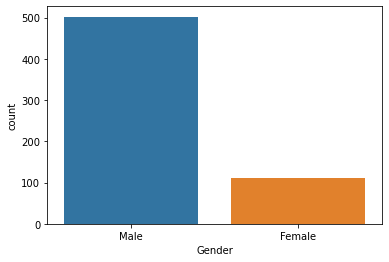

In [14]:
#Categorical attribute visualization
sns.countplot(train_data['Gender'])

C:\Users\dnyan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

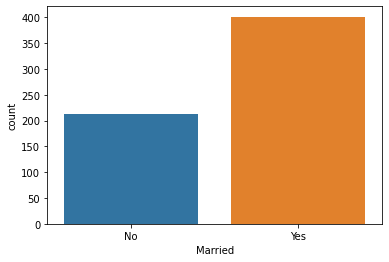

In [15]:
sns.countplot(train_data['Married'])

C:\Users\dnyan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

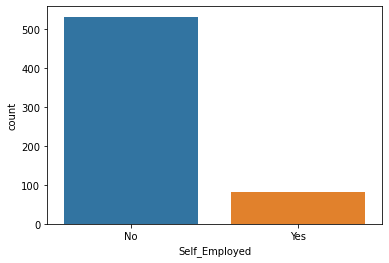

In [16]:
sns.countplot(train_data['Self_Employed'])

C:\Users\dnyan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

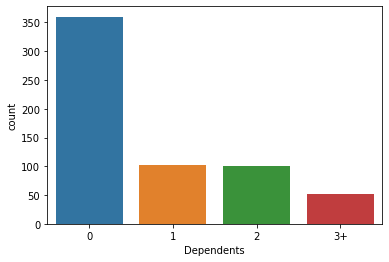

In [17]:
sns.countplot(train_data['Dependents'])

C:\Users\dnyan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

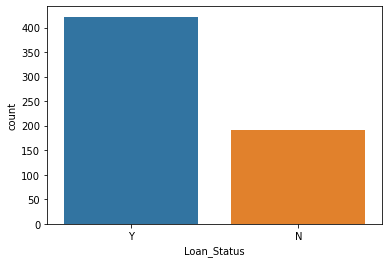

In [18]:
sns.countplot(train_data['Loan_Status'])

In [19]:
## Visualization
def bar_chart(col): 
    Approved = train_data[train_data["Loan_Status"]=="Y"][col].value_counts() 
    Disapproved = train_data[train_data["Loan_Status"]=="N"][col].value_counts() 
    
    df1 = pd.DataFrame([Approved, Disapproved]) 
    df1.index = ["Approved", "Disapproved"] 
    df1.plot(kind="bar")

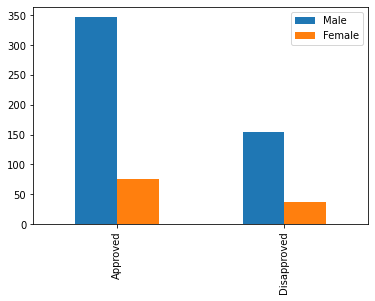

In [20]:
bar_chart("Gender")

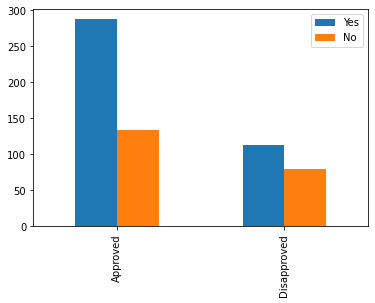

In [21]:
bar_chart("Married")

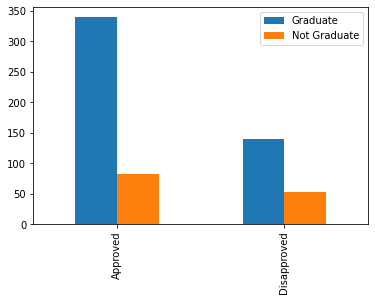

In [22]:
bar_chart("Education")

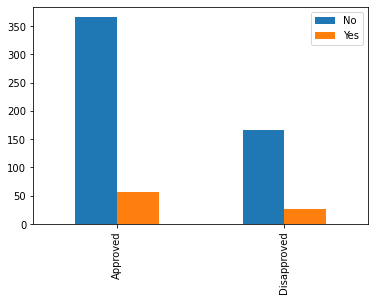

In [23]:
bar_chart("Self_Employed")

C:\Users\dnyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

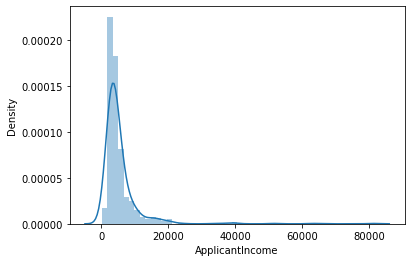

In [24]:
#Numerical attribute visualization
sns.distplot(train_data['ApplicantIncome'])

C:\Users\dnyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

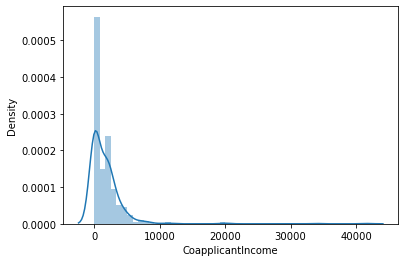

In [25]:
sns.distplot(train_data['CoapplicantIncome'])

C:\Users\dnyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

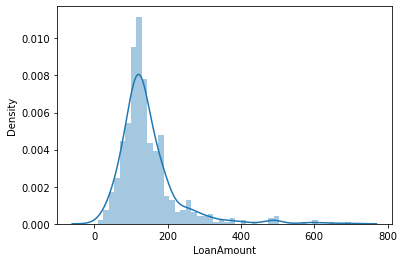

In [26]:
sns.distplot(train_data['LoanAmount'])

C:\Users\dnyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

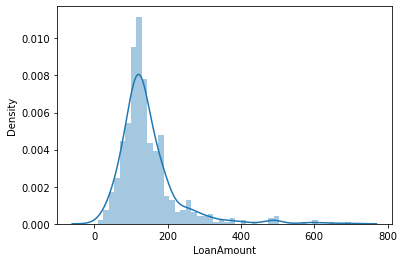

In [27]:
sns.distplot(train_data['LoanAmount'])

C:\Users\dnyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

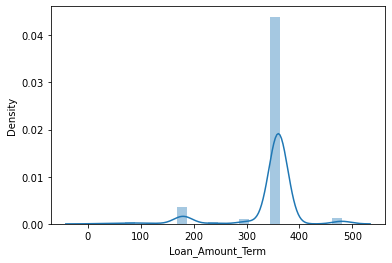

In [28]:
sns.distplot(train_data['Loan_Amount_Term'])

C:\Users\dnyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

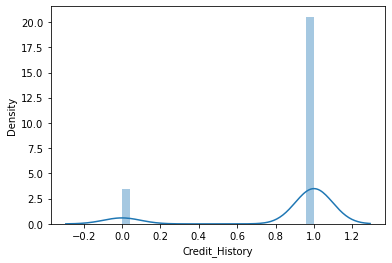

In [29]:

sns.distplot(train_data['Credit_History'])

#### creation of new attributes


In [30]:
#total income
train_data["Total_income"]= train_data['ApplicantIncome'] + train_data['CoapplicantIncome']
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


### Log Transformation

C:\Users\dnyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

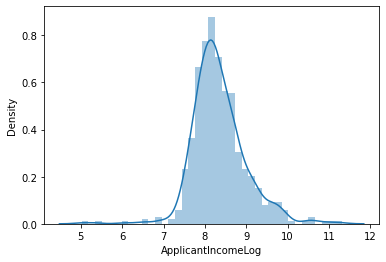

In [31]:
#apply log transformation to the attribute
train_data['ApplicantIncomeLog']=np.log(train_data['ApplicantIncome']+1)
sns.distplot(train_data["ApplicantIncomeLog"])

C:\Users\dnyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncomeLog', ylabel='Density'>

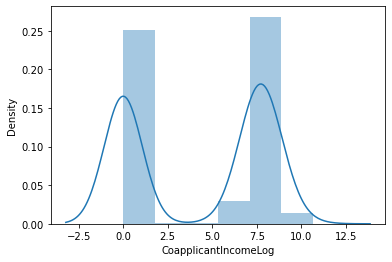

In [32]:
train_data['CoapplicantIncomeLog']=np.log(train_data["CoapplicantIncome"]+1)
sns.distplot(train_data["CoapplicantIncomeLog"])

C:\Users\dnyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmountLog', ylabel='Density'>

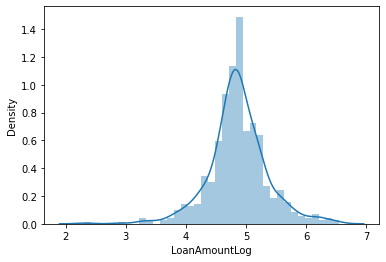

In [33]:
train_data['LoanAmountLog']=np.log(train_data['LoanAmount']+1)
sns.distplot(train_data["LoanAmountLog"])

C:\Users\dnyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term_Log', ylabel='Density'>

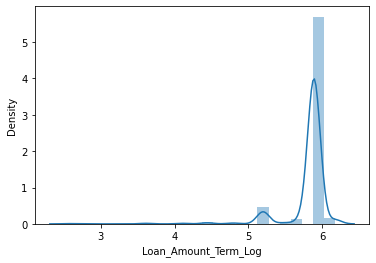

In [34]:
train_data['Loan_Amount_Term_Log']=np.log(train_data['Loan_Amount_Term']+1)
sns.distplot(train_data["Loan_Amount_Term_Log"])

C:\Users\dnyan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Income_Log', ylabel='Density'>

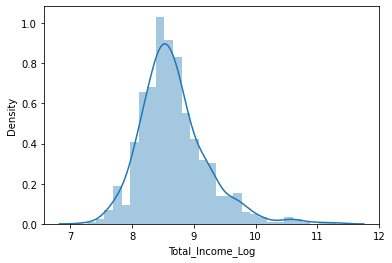

In [35]:
train_data['Total_Income_Log'] = np.log(train_data['Total_income']+1)
sns.distplot(train_data["Total_Income_Log"])

In [36]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674197,0.000000,4.859812,5.888878,8.674197
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327,7.319202,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701,0.000000,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094,7.765993,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681,0.000000,4.955827,5.888878,8.699681


In [37]:
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_income", 'CoapplicantIncomeLog']
train_data = train_data.drop(columns=cols, axis=1)

In [38]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.859812,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681


In [39]:
train_data.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [40]:
train_data.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

#### handling categorical data

In [41]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                614 non-null    object 
 1   Married               614 non-null    object 
 2   Dependents            614 non-null    object 
 3   Education             614 non-null    object 
 4   Self_Employed         614 non-null    object 
 5   Credit_History        614 non-null    float64
 6   Property_Area         614 non-null    object 
 7   Loan_Status           614 non-null    object 
 8   ApplicantIncomeLog    614 non-null    float64
 9   LoanAmountLog         614 non-null    float64
 10  Loan_Amount_Term_Log  614 non-null    float64
 11  Total_Income_Log      614 non-null    float64
dtypes: float64(5), object(7)
memory usage: 57.7+ KB


In [42]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.859812,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681


In [43]:
d1 = pd.get_dummies(train_data['Gender'], drop_first= True)
d2 = pd.get_dummies(train_data['Married'], drop_first= True)
d3 = pd.get_dummies(train_data['Dependents'], drop_first= True)
d4 = pd.get_dummies(train_data['Education'], drop_first= True)
d5 = pd.get_dummies(train_data['Self_Employed'], drop_first= True)
d6 = pd.get_dummies(train_data['Property_Area'], drop_first= True)

In [44]:
df1 = pd.concat([train_data, d1, d2, d3, d4, d5, d6], axis = 1)
train_data=df1

cols = ['Gender', 'Married', "Dependents", "Education", "Self_Employed", 'Property_Area']
train_data = train_data.drop(columns=cols, axis=1)

In [45]:
train_data.head()

,Credit_History,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,1.0,Y,8.674197,4.859812,5.888878,8.674197,1,0,0,0,0,0,0,0,1
1,1.0,N,8.430327,4.859812,5.888878,8.714732,1,1,1,0,0,0,0,0,0
2,1.0,Y,8.006701,4.204693,5.888878,8.006701,1,1,0,0,0,0,1,0,1
3,1.0,Y,7.857094,4.795791,5.888878,8.505525,1,1,0,0,0,1,0,0,1
4,1.0,Y,8.699681,4.955827,5.888878,8.699681,1,0,0,0,0,0,0,0,1


In [46]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Credit_History        614 non-null    float64
 1   Loan_Status           614 non-null    object 
 2   ApplicantIncomeLog    614 non-null    float64
 3   LoanAmountLog         614 non-null    float64
 4   Loan_Amount_Term_Log  614 non-null    float64
 5   Total_Income_Log      614 non-null    float64
 6   Male                  614 non-null    uint8  
 7   Yes                   614 non-null    uint8  
 8   1                     614 non-null    uint8  
 9   2                     614 non-null    uint8  
 10  3+                    614 non-null    uint8  
 11  Not Graduate          614 non-null    uint8  
 12  Yes                   614 non-null    uint8  
 13  Semiurban             614 non-null    uint8  
 14  Urban                 614 non-null    uint8  
dtypes: float64(5), object(1

In [47]:
train_data.describe()

,Credit_History,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.855049,8.341510,4.866091,5.806547,8.669608,0.817590,0.653094,0.166124,0.164495,0.083062,0.218241,0.133550,0.379479,0.328990
std,0.352339,0.645035,0.490811,0.309785,0.545017,0.386497,0.476373,0.372495,0.371027,0.276201,0.413389,0.340446,0.485653,0.470229
min,0.000000,5.017280,2.302585,2.564949,7.274480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,7.965024,4.617584,5.888878,8.334952,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,8.246303,4.859812,5.888878,8.597390,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,8.664922,5.110477,5.888878,8.925682,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,11.302217,6.552508,6.175867,11.302217,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Test datasets

In [48]:
test = pd.read_csv("../../../Datasets/Loan Prediction/test_data.csv")
# filling numerical missing data
test['LoanAmount']=test['LoanAmount'].fillna(test['LoanAmount'].mean())
test['Loan_Amount_Term']=test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean())
test['Credit_History']=test['Credit_History'].fillna(test['Credit_History'].mean())

# filling categorical missing data
test['Gender']=test['Gender'].fillna(test['Gender'].mode()[0])
test['Married']=test['Married'].fillna(test['Married'].mode()[0])
test['Dependents']=test['Dependents'].fillna(test['Dependents'].mode()[0])
test['Self_Employed']=test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])

test['Total_income'] = test['ApplicantIncome']+test['CoapplicantIncome']

# apply log transformation to the attribute
test['ApplicantIncomeLog'] = np.log(test['ApplicantIncome']+1)

test['CoapplicantIncomeLog'] = np.log(test['CoapplicantIncome']+1)

test['LoanAmountLog'] = np.log(test['LoanAmount'])

test['Loan_Amount_Term_Log'] = np.log(test['Loan_Amount_Term']+1)

test['Total_Income_Log'] = np.log(test['Total_income']+1)

cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_income", 'Loan_ID', 'CoapplicantIncomeLog']
test = test.drop(columns=cols, axis=1)

t1 = pd.get_dummies(test['Gender'], drop_first= True)
t2 = pd.get_dummies(test['Married'], drop_first= True)
t3 = pd.get_dummies(test['Dependents'], drop_first= True)
t4 = pd.get_dummies(test['Education'], drop_first= True)
t5 = pd.get_dummies(test['Self_Employed'], drop_first= True)
t6 = pd.get_dummies(test['Property_Area'], drop_first= True)



df1 = pd.concat([test, t1, t2, t3, t4, t5, t6], axis = 1)
test=df1

cols = ['Gender', 'Married', "Dependents", "Education", "Self_Employed", 'Property_Area']
test = test.drop(columns=cols, axis=1)

In [49]:
test.head()

,Credit_History,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,1.000000,8.651899,4.700480,5.888878,8.651899,1,1,0,0,0,0,0,0,1
1,1.000000,8.031710,4.836282,5.888878,8.428799,1,1,1,0,0,0,0,0,1
2,1.000000,8.517393,5.337538,5.888878,8.824825,1,1,0,1,0,0,0,0,1
3,0.825444,7.758333,4.605170,5.888878,8.494334,1,1,0,1,0,0,0,0,1
4,1.000000,8.094684,4.356709,5.888878,8.094684,1,0,0,0,0,1,0,0,1


In [50]:
### split datasets

In [51]:
train_data.head()

,Credit_History,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,1.0,Y,8.674197,4.859812,5.888878,8.674197,1,0,0,0,0,0,0,0,1
1,1.0,N,8.430327,4.859812,5.888878,8.714732,1,1,1,0,0,0,0,0,0
2,1.0,Y,8.006701,4.204693,5.888878,8.006701,1,1,0,0,0,0,1,0,1
3,1.0,Y,7.857094,4.795791,5.888878,8.505525,1,1,0,0,0,1,0,0,1
4,1.0,Y,8.699681,4.955827,5.888878,8.699681,1,0,0,0,0,0,0,0,1


In [52]:
# specify input and output attributes
x = train_data.drop(columns=['Loan_Status'], axis=1)
y = train_data['Loan_Status']

In [53]:
x

,Credit_History,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,1.0,8.674197,4.859812,5.888878,8.674197,1,0,0,0,0,0,0,0,1
1,1.0,8.430327,4.859812,5.888878,8.714732,1,1,1,0,0,0,0,0,0
2,1.0,8.006701,4.204693,5.888878,8.006701,1,1,0,0,0,0,1,0,1
3,1.0,7.857094,4.795791,5.888878,8.505525,1,1,0,0,0,1,0,0,1
4,1.0,8.699681,4.955827,5.888878,8.699681,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,7.972811,4.276666,5.888878,7.972811,0,0,0,0,0,0,0,0,0
610,1.0,8.320448,3.713572,5.198497,8.320448,1,1,0,0,1,0,0,0,0
611,1.0,8.996280,5.537334,5.888878,9.025576,1,1,1,0,0,0,0,0,1
612,1.0,8.933796,5.236442,5.888878,8.933796,1,1,0,1,0,0,0,0,1


In [54]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [56]:
x_train.head()

,Credit_History,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
92,1.0,8.093768,4.406719,5.888878,8.535819,1,1,0,1,0,1,0,0,1
304,1.0,8.294300,4.948760,5.888878,8.779711,1,0,0,0,0,0,0,0,0
68,1.0,8.867991,4.836282,4.110874,8.867991,1,1,0,0,1,1,1,0,1
15,1.0,8.507345,4.836282,5.888878,8.507345,1,0,0,0,0,0,0,0,1
211,0.0,8.140607,4.859812,5.888878,8.451267,1,1,0,0,1,0,0,1,0


In [57]:
y_test.head()

350    Y
377    Y
163    Y
609    Y
132    Y
Name: Loan_Status, dtype: object

In [58]:
# randomforest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(x_train, y_train)
print("Accuracy is", rf.score(x_test, y_test)*100)

Accuracy is 77.92207792207793


In [59]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
print("Accuracy is",dt.score(x_test, y_test)*100)

Accuracy is 70.77922077922078


In [60]:
# logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
print("Accuracy is",lr.score(x_test, y_test)*100)

Accuracy is 77.27272727272727


In [61]:
# random forest classifier
from sklearn.metrics import confusion_matrix
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[23, 31],
       [ 3, 97]], dtype=int64)

In [62]:
import pickle

In [63]:
#import pickle
file=open("Loan_prediction_model.pkl", 'wb')
pickle.dump(rf, file)

In [64]:
model=pickle.load(open("Loan_prediction_model.pkl","rb"))

In [65]:
y_test_pred=model.predict(test)

In [66]:
y_test_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y